Wyszukiwanie obrazu przy użyciu autoenkodera prostego!

In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
encoding_dim = 15  # wymiar kodowania skompresowanego
input_img = Input(shape=(784,), name='Warstwa_wejściowa') # warstwa wejsciowa
encoded = Dense(encoding_dim, activation='relu', name='Enkoder')(input_img) # reprezentacja zakodowana
decoded = Dense(784, activation='sigmoid', name='Dekoder')(encoded) # reprezentacja zdekodowana
autoencoder = Model(input_img, decoded, name='Prosty_autoenkoder') # model autoenkodera

In [3]:
encoder = Model(input_img, encoded) # model enkodera
encoded_input = Input(shape=(encoding_dim,)) # input dla dekodera
decoder_layer = autoencoder.layers[-1] # ostatnia warstwa autoenkodera czyli dekoder
decoder = Model(encoded_input, decoder_layer(encoded_input)) # model dekodera

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
history=autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3128 - val_loss: 0.2274
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2036 - val_loss: 0.1837
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1746 - val_loss: 0.1650
Epoch 4/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1606 - val_loss: 0.1543
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1525 - val_loss: 0.1483
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1480 - val_loss: 0.1451
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1452 - val_loss: 0.1427
Epoch 8/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1431 - val_loss: 0.1408
Epoch 9/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1413 - val_loss: 0.1392
Epoch 10/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1398 - val_loss: 0.1377

In [12]:
test_size=5
x_test3=x_test[0:test_size]

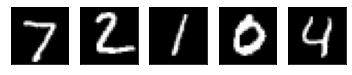

In [13]:
for i in range(0,test_size):
    ax=plt.subplot(1,test_size,i+1)
    plt.imshow(x_test3[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()

#ax=plt.subplot(1,3,1)
#plt.imshow(x_test3[0].reshape(28,28))
#ax.get_xaxis()
#ax=plt.subplot(1,3,2)
#plt.imshow(x_test3[1].reshape(28,28))
#ax=plt.subplot(1,3,3)
#plt.imshow(x_test3[2].reshape(28,28))
#plt.gray()


In [23]:
shape_img_resize = tuple([int(x) for x in encoder.input.shape[1:]])
input_shape_model = tuple([int(x) for x in encoder.input.shape[1:]])
output_shape_model = tuple([int(x) for x in encoder.output.shape[1:]])

In [24]:
E_train = encoder.predict(x_train)
#E_train_flatten = E_train.reshape((-1, np.prod(output_shape_model)))
E_test = encoder.predict(x_test3)
#E_test_flatten = E_test.reshape((-1, np.prod(output_shape_model)))

In [28]:
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(E_train)

NearestNeighbors(metric='cosine')

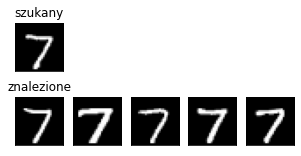

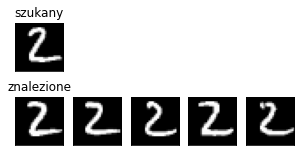

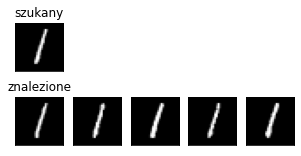

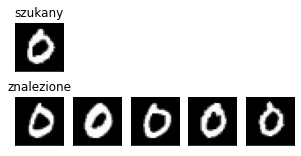

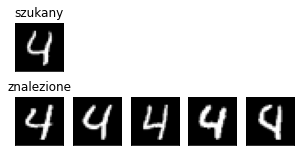

In [30]:
for i, emb_flatten in enumerate(E_test):
    _, indices = knn.kneighbors([emb_flatten]) # find k nearest train neighbours
    #img_query = imgs_test[i] # query image
    imgs_retrieval = [x_train[idx] for idx in indices.flatten()] # retrieval images
    plt.figure(i, figsize=(5,2.5))
    #fig, ax=plt.subplots(2,5)
    #ax[0,0].imshow(x_test3[i].reshape(28,28))
    ax=plt.subplot(2,5,1)
    plt.imshow(x_test3[i].reshape(28,28))
    ax.title.set_text('szukany')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for j, idx in enumerate(indices.flatten()):
        ax=plt.subplot(2,5,5+j+1)
        if j==0:
            ax.title.set_text('znalezione')
        plt.imshow(x_train[idx].reshape(28,28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
       # ax[1,j]=plt.imshow(x_train[idx].reshape(28,28))